# Implement LeNet5 (any version) by Tensorflow (Keras is ok) and Pytorch.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
# 1. Create a dataframe for save the model performance. 
df_performance = pd.DataFrame(columns=['model', 'accuracy',
                                       'training_time', 'inference_time',
                                       'num_parameters','flops'])

# 2. Create a dataframe for record the model training procedure.
df_model_tf_dynamic= pd.DataFrame(columns=['model','epoch', 'train_loss', 'train_acc',
                                  'val_loss', 'val_acc'])
df_model_tf_static = df_model_tf_dynamic
df_model_pt = df_model_tf_dynamic
df_model_hc = df_model_tf_dynamic


# df_model_pt.loc[str(0)] = ['model1', 0, 0, 0, 0, 0]
# df_model_pt.loc[str(0), 'val_acc'] = 1
# print(df_model_pt.head(5))
# df_model_pt = df_model_pt[0:0]
# df_model.head(5)

    model  epoch  train_loss  train_acc  val_loss  val_acc
0  model1      0           0          0         0        1


## Tensorflow
https://www.tensorflow.org/overview?hl=zh-cn

In [2]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model

2023-05-28 16:06:41.635826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 16:06:42.187912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.12.0


### Split dataset
Only do once.

In [3]:
img_dir = './dataset/'
file_path = os.path.join(img_dir,'train.txt')
with open(file_path, 'r') as f:
    lines = f.readlines()
train_data = [line.rstrip().split() for line in lines]
for idx in range(len(train_data)):
    image_path, image_label = train_data[idx]
    img = Image.open(img_dir+image_path)
    label = int(image_label)
    if not os.path.exists(img_dir+"train/"+str(label)):
        os.makedirs(img_dir+"train/"+str(label))
    img.save(img_dir+"train/"+str(label)+"/"+image_path.split('/')[-1])


In [4]:
file_path = os.path.join(img_dir,'val.txt')
with open(file_path, 'r') as f:
    lines = f.readlines()
val_data = [line.rstrip().split() for line in lines]
for idx in range(len(val_data)):
    image_path, image_label = val_data[idx]
    img = Image.open(img_dir+image_path)
    label = int(image_label)
    if not os.path.exists(img_dir+"val/"+str(label)):
        os.makedirs(img_dir+"val/"+str(label))
    img.save(img_dir+"val/"+str(label)+"/"+image_path.split('/')[-1])


In [5]:
file_path = os.path.join(img_dir,'test.txt')
with open(file_path, 'r') as f:
    lines = f.readlines()
test_data = [line.rstrip().split() for line in lines]
for idx in range(len(test_data)):
    image_path, image_label = test_data[idx]
    img = Image.open(img_dir+image_path)
    label = int(image_label)
    if not os.path.exists(img_dir+"test/"+str(label)):
        os.makedirs(img_dir+"test/"+str(label))
    img.save(img_dir+"test/"+str(label)+"/"+image_path.split('/')[-1])


### Load dataset

In [3]:
img_dir_train = './dataset/train/'
img_dir_val = './dataset/val/'
img_dir_test = './dataset/test/'
image_size = (64, 64)
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir_val,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
) 
test_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 63325 files belonging to 50 classes.
Found 450 files belonging to 50 classes.
Found 450 files belonging to 50 classes.


2023-05-28 16:06:46.087377: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 16:06:46.106358: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
class tensorflow_LeNet5(Model):
  def __init__(self):
    super(tensorflow_LeNet5, self).__init__()
    self.conv1 = Conv2D(6, 5, activation='relu')
    self.maxpool = MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")
    self.conv2 = Conv2D(16, 5, activation='relu')
    self.maxpoo2 = MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")

    self.flatten = Flatten()
    self.d1 = Dense(500, activation='relu')
    self.d2 = Dense(50)
    
  def call(self, x):
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = self.maxpoo2(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
input_shape = (32, 64, 64, 1)
model = tensorflow_LeNet5()
model.build(input_shape)
model.call(tf.keras.layers.Input(shape=(64, 64, 1)))
print(model.summary())

Model: "tensorflow__le_net5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 500)       

In [5]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### Dynamic

In [6]:
# @tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    # predictions = model(images, training=True)
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

# @tf.function
def val_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  # predictions = model(images, training=False)
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  val_loss(t_loss)
  val_accuracy(labels, predictions)

# @tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  # predictions = model(images, training=False)
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [7]:
EPOCHS = 5
start_time = time.time()
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for val_images, val_labels in val_ds:
    val_step(val_images, val_labels)

  print ('Epoch [{}/{}]:: Training Loss:   {:.4f}, Training Accuracy:   {:.4f} %' 
      .format(epoch+1, EPOCHS, train_loss.result(), train_accuracy.result()*100))
  print ('Epoch [{}/{}]:: Validation Loss: {:.4f}, Validation Accuracy: {:.4f} %' 
      .format(epoch+1, EPOCHS, val_loss.result(), val_accuracy.result()*100))
  
  df_model_tf_dynamic.loc[str(epoch+1)] = ['TensorFlow LeNet5', epoch+1, 
                                train_loss.result().numpy(), (train_accuracy.result()*100).numpy(), 
                                val_loss.result().numpy(), (val_accuracy.result()*100).numpy()]
training_time = time.time() - start_time

# Test the model
start_time = time.time()
for test_images, test_labels in test_ds:
  test_step(test_images, test_labels)
inference_time = time.time() - start_time
print ('Epoch [{}]:: Test Loss: {:.4f}, Test Accuracy: {:.4f} %' 
      .format(EPOCHS, test_loss.result(), test_accuracy.result()*100))

df_performance.loc['TensorFlow LeNet5_dynamic'] = ['TensorFlow LeNet5',
      (test_accuracy.result()*100).numpy(),
      training_time/60, inference_time,
      0,0]
df_performance.head(5)

2023-05-28 16:07:04.363521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [63325]
	 [[{{node Placeholder/_4}}]]
2023-05-28 16:07:04.363790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [63325]
	 [[{{node Placeholder/_4}}]]
2023-05-28 16:08:12.719758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [450]

Epoch [1/5]:: Training Loss:   4.2052, Training Accuracy:   4.9254 %
Epoch [1/5]:: Validation Loss: 3.7393, Validation Accuracy: 6.6667 %
Epoch [2/5]:: Training Loss:   3.4573, Training Accuracy:   10.7383 %
Epoch [2/5]:: Validation Loss: 3.4753, Validation Accuracy: 8.6667 %
Epoch [3/5]:: Training Loss:   3.0262, Training Accuracy:   20.0521 %
Epoch [3/5]:: Validation Loss: 3.7468, Validation Accuracy: 9.7778 %
Epoch [4/5]:: Training Loss:   2.4304, Training Accuracy:   34.5835 %
Epoch [4/5]:: Validation Loss: 4.7551, Validation Accuracy: 8.6667 %
Epoch [5/5]:: Training Loss:   1.7396, Training Accuracy:   51.9447 %
Epoch [5/5]:: Validation Loss: 5.4539, Validation Accuracy: 10.4444 %
Epoch [5]:: Test Loss: 5.3384, Test Accuracy: 11.1111 %


2023-05-28 16:12:45.424006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [450]
	 [[{{node Placeholder/_0}}]]
2023-05-28 16:12:45.424253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [450]
	 [[{{node Placeholder/_0}}]]


,model,accuracy,training_time,inference_time,num_parameters,flops
TensorFlow LeNet5_dynamic,TensorFlow LeNet5,11.111112,5.68441,0.134759,0,0


## Pytorch
https://github.com/gradient-ai/LeNet5-Tutorial?ref=blog.paperspace.com

In [8]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from thop import profile

In [9]:
# Dataset
# # mini-ImageNet datase
# 定義自己的dataset
class dataset_C0(torch.utils.data.Dataset): # type: ignore
    def __init__(self, file_path, image_size=(256,256)):
        with open(file_path, 'r') as f:
            lines = f.readlines()
        self.data = [line.rstrip().split() for line in lines]
        self.transform = transforms.Compose([
            transforms.Resize(image_size),
            # transforms.Grayscale(num_output_channels=1),
            # transforms.CenterCrop(image_size-1),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) # RGB
            transforms.Normalize(mean=(0.456),std=(0.224)) # Gray
        ])
        self.root_path = './dataset/'

    def __getitem__(self, idx):
        image_path, image_label = self.data[idx]
        img = Image.open(self.root_path+image_path).convert('L') # GrayScale
        img = self.transform(img)
        return img, int(image_label)

    def __len__(self):
        return len(self.data)

# train set, val set, test set
dataset_path = './dataset'
feature_name_list = ['Resnet50','HoG']
feature_name = feature_name_list[0]
batch_size = 450
num_classes = 50
IMG_SIZE = (64,64)#(128,128)#(32,32)
train_data = dataset_C0(os.path.join(dataset_path,'train.txt'), IMG_SIZE)
val_data = dataset_C0(os.path.join(dataset_path,'val.txt'), IMG_SIZE)
test_data = dataset_C0(os.path.join(dataset_path,'test.txt'), IMG_SIZE)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True) # type: ignore
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False) # type: ignore
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False) # type: ignore

In [35]:
model = pytorch_LeNet5(num_classes)
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
input_data = torch.randn(1, 1, 64, 64).to(device)
flops, params = profile(model, inputs=(input, ))
print('FLOPs: {:,.2f}'.format(flops))

1380166
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.


TypeError: conv2d() received an invalid combination of arguments - got (method, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!method!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!method!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)


In [ ]:
total_params = sum(
	param.numel() for param in model.parameters()
)


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = pytorch_LeNet5(num_classes).to(device)

learning_rate = 0.001
num_epochs = 5

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
total_step = len(train_loader)
start_time = time.time()
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        train_loss = cost(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        	
        # Backward and optimize
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print ('Epoch [{}/{}]:: Training Loss:   {:.4f}, Training Accuracy:   {:.4f} %' 
                    .format(epoch+1, num_epochs, train_loss.item(), train_accuracy))

    with torch.no_grad(): 
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(val_loader): 
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            val_loss = cost(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        print ('Epoch [{}/{}]:: Validation Loss: {:.4f}, Validation Accuracy: {:.4f} %' 
                    .format(epoch+1, num_epochs, val_loss.item(), val_accuracy))
    
    df_model_pt.loc[str(epoch+1)] = ['PyTorch LeNet5', epoch+1, 
                                train_loss.item(), train_accuracy,
                                val_loss.item(), val_accuracy]

training_time = time.time() - start_time


Epoch [1/5]:: Training Loss:   3.3508, Training Accuracy:   10.1619 %
Epoch [1/5]:: Validation Loss: 3.2702, Validation Accuracy: 13.1111 %


/tmp/ipykernel_657015/3821053885.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_pt.loc[str(epoch+1)] = ['PyTorch LeNet5', epoch+1,


Epoch [2/5]:: Training Loss:   3.0654, Training Accuracy:   16.4106 %
Epoch [2/5]:: Validation Loss: 3.1524, Validation Accuracy: 17.3333 %


/tmp/ipykernel_657015/3821053885.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_pt.loc[str(epoch+1)] = ['PyTorch LeNet5', epoch+1,


Epoch [3/5]:: Training Loss:   2.9494, Training Accuracy:   19.5973 %
Epoch [3/5]:: Validation Loss: 3.0596, Validation Accuracy: 17.3333 %


/tmp/ipykernel_657015/3821053885.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_pt.loc[str(epoch+1)] = ['PyTorch LeNet5', epoch+1,


Epoch [4/5]:: Training Loss:   2.8559, Training Accuracy:   22.3324 %
Epoch [4/5]:: Validation Loss: 3.0360, Validation Accuracy: 19.5556 %


/tmp/ipykernel_657015/3821053885.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_pt.loc[str(epoch+1)] = ['PyTorch LeNet5', epoch+1,


Epoch [5/5]:: Training Loss:   2.7829, Training Accuracy:   24.7011 %
Epoch [5/5]:: Validation Loss: 2.9825, Validation Accuracy: 20.2222 %


/tmp/ipykernel_657015/3821053885.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_pt.loc[str(epoch+1)] = ['PyTorch LeNet5', epoch+1,


In [36]:
df_model_pt

,model,epoch,train_loss,train_acc,val_loss,val_acc
0,model1,0,0.000000,0.000000,0.000000,1.000000
1,PyTorch LeNet5,1,3.252679,10.176076,3.301764,14.444444
2,PyTorch LeNet5,2,3.048105,16.604816,3.096030,17.555556
3,PyTorch LeNet5,3,3.002159,20.151599,3.068748,19.333333


In [92]:
# 统计模型的FLOPs和参数数量
# input_data = torch.randn(1, 1, 64, 64).to(device)
# flops, params = profile(model, inputs=(input, ))
# print('MACs: {:,.2f}'.format(flops))

In [13]:
# Test the model
start_time = time.time()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    print('Test Accuracy: {:.4f} %'.format(test_accuracy))
inference_time = time.time() - start_time
    
df_performance.loc['PyTroch LeNet5'] = ['PyTroch LeNet5',
    test_accuracy,
    training_time/60, inference_time,
    0, 0]
df_performance.head(5)


Test Accuracy: 23.1111 %


,model,accuracy,training_time,inference_time,num_parameters,flops
TensorFlow LeNet5_dynamic,TensorFlow LeNet5,11.111112,5.684410,0.134759,0,0
PyTroch LeNet5,PyTroch LeNet5,23.111111,3.590316,0.289923,0,0


# Performance Comparison (accuracy, inference time, space complexity, and flops) of the TF/Pytorch and your handcrafted versions. 

## My handcrafted versions

In [8]:
from net import LeNet5_mini
import importlib
importlib.reload(LeNet5_mini)
net = LeNet5_mini.LeNet5_mini()

ModuleNotFoundError: No module named 'net'

In [ ]:
def top_1_acc(y_true, y_pred):
    """
    計算 top 1 accuracy
    
    參數:
    y_true -- 真實標籤 (numpy array= m x 1)
    y_pred -- 模型預測機率 (numpy array= m x n)
    k -- 前 k 高的機率會被考慮 (int)
    m -- 樣本個數
    n -- 標籤數量
    
    回傳:
    accuracy -- top k accuracy (float)
    """
    sorted_indices = np.flip(np.argsort(y_pred,axis=1),axis=1) # Descent sorting
    pred_top1 = sorted_indices[:,0]
    accuracy = np.mean(y_true==pred_top1)
    
    return accuracy

In [102]:
iterations_num = 0 # 记录训练的迭代次数

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []
train_step = len(train_loader)
val_step = len(val_loader)
split_num = 2
start_time = time.time()
for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    train_acc = 0
    val_acc = 0

    batch_loss = 0
    batch_acc = 0
    epoch_loss = 0
    epoch_acc = 0

    ### training
    for i, (images, labels) in enumerate(train_loader):  
        # Forward pass
        loss, prediction = net.forward(images.numpy(),
                                    labels.numpy(),
                                    is_train=True)
        
        train_loss += loss
        train_acc += top_1_acc(labels.numpy(), prediction)
        # for j in range(prediction.shape[0]):
        #     if np.argmax(prediction[j]) == labels[j]:
        #         train_acc += 1

        net.backward(learning_rate)

    train_loss_list.append(train_loss/train_step)
    train_acc_list.append(train_acc/train_step)

    print ('Epoch [{}/{}]:: Training Loss: {:.4f}, Training Accuracy: {:.4f} %' 
                    .format(epoch+1, num_epochs, np.mean(train_loss_list), np.mean(train_acc_list)))


    ### validation
    for i, (images, labels) in enumerate(val_loader):  
        # Forward pass
        loss, prediction = net.forward(images.numpy(),
                                    labels.numpy(),
                                    is_train=False)
        
        val_loss += loss
        val_acc += top_1_acc(labels.numpy(), prediction)
        # for j in range(prediction.shape[0]):
        #     if np.argmax(prediction[j]) == labels[j]:
        #         val_acc += 1

    val_loss_list.append(val_loss/val_step)
    val_acc_list.append(val_acc/val_step)

    print ('Epoch [{}/{}]:: Validation Loss: {:.4f}, Validation Accuracy: {:.4f} %' 
                    .format(epoch+1, num_epochs, np.mean(val_loss_list), np.mean(val_acc_list)))

       
    df_model.loc['Handcrfted PyTorch LeNet5'] = ['Handcrfted PyTorch LeNet5', epoch+1, 
                                train_loss.item(), train_accuracy,
                                val_loss.item(), val_accuracy]
training_time = time.time() - start_time

NameError: name 'net' is not defined

In [ ]:
train_loss, train_acc = 0, 0
val_loss, val_acc = 0, 0
test_loss, test_acc = 0, 0
### training
for i, (images, labels) in enumerate(train_loader):  
        # Forward pass
        loss, prediction = net.forward(images.numpy(),
                                        labels.numpy(),
                                        is_train=False)
        
        train_loss += loss
        train_acc += top_1_acc(labels.numpy(), prediction)
Train_acc = train_acc/len(train_loader)

### validation
for i, (images, labels) in enumerate(val_loader):
        # Forward pass
        loss, prediction = net.forward(images.numpy(),
                                        labels.numpy(),
                                        is_train=False)
        
        val_loss += loss
        val_acc += top_1_acc(labels.numpy(), prediction)
Val_acc = val_acc/len(val_loader)

### test
start_time = time.time()
for i, (images, labels) in enumerate(test_loader):
        # Forward pass
        loss, prediction = net.forward(images.numpy(),
                                        labels.numpy(),
                                        is_train=False)
        
        test_loss += loss
        test_acc += top_1_acc(labels.numpy(), prediction)
Test_acc = test_acc/len(test_loader)
inference_time = time.time() - start_time

print('LeNet-5')
print('Train accuracy: {:.3f}; Val accuracy: {:.3f}; Test accuracy: {:.3f}'.format(
        Train_acc, Val_acc, Test_acc))


## Performance Comparision

In [21]:
df_model_tf_dynamic

,model,epoch,train_loss,train_acc,val_loss,val_acc
1,TensorFlow LeNet5,1,4.205170,4.925385,3.739335,6.666667
2,TensorFlow LeNet5,2,3.457292,10.738256,3.475284,8.666667
3,TensorFlow LeNet5,3,3.026161,20.052113,3.746779,9.777778
4,TensorFlow LeNet5,4,2.430409,34.583496,4.755141,8.666667
5,TensorFlow LeNet5,5,1.739586,51.944725,5.453932,10.444445


In [16]:
df_model_pt

,model,epoch,train_loss,train_acc,val_loss,val_acc
1,PyTorch LeNet5,1,3.350824,10.161863,3.270228,13.111111
2,PyTorch LeNet5,2,3.065402,16.410580,3.152390,17.333333
3,PyTorch LeNet5,3,2.949365,19.597315,3.059574,17.333333
4,PyTorch LeNet5,4,2.855933,22.332412,3.035990,19.555556
5,PyTorch LeNet5,5,2.782906,24.701145,2.982459,20.222222


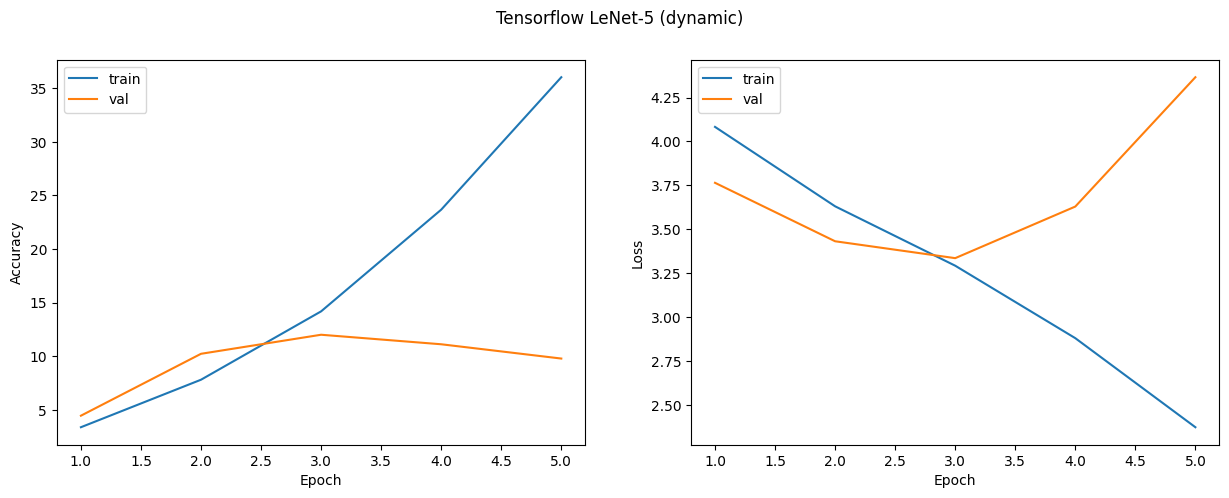

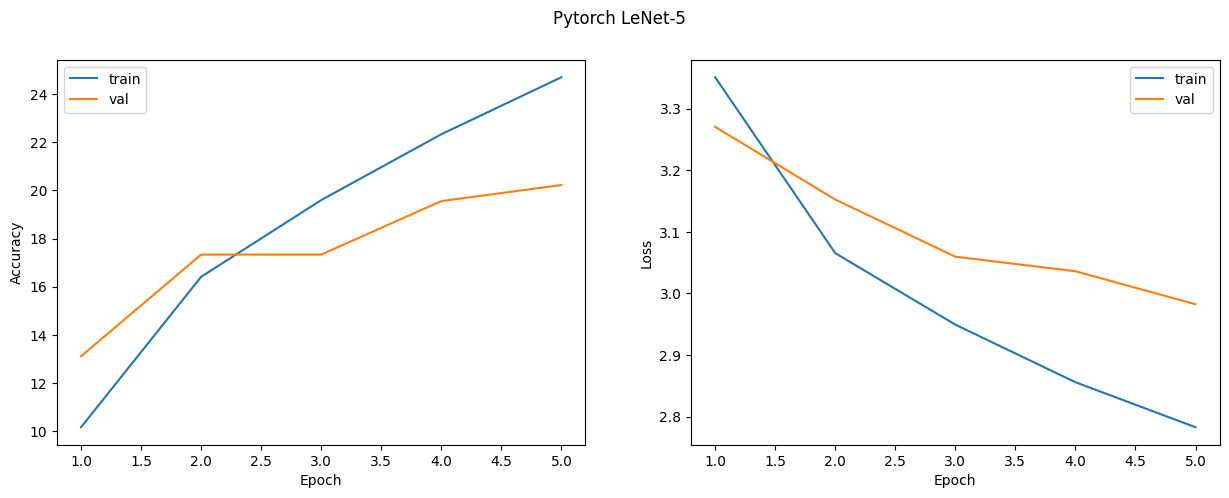

In [36]:
# Plot the accuracy and loss in the same figure
# Tensorflow LeNet-5 dynamic
fig,ax = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Tensorflow LeNet-5 (dynamic)')
ax[0].plot(range(1,num_epochs+1),df_model_tf_dynamic['train_acc'], label='train')
ax[0].plot(range(1,num_epochs+1),df_model_tf_dynamic['val_acc'], label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(range(1,num_epochs+1),df_model_tf_dynamic['train_loss'], label='train')
ax[1].plot(range(1,num_epochs+1),df_model_tf_dynamic['val_loss'], label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Pytorch LeNet-5
fig,ax = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Pytorch LeNet-5')
ax[0].plot(range(1,num_epochs+1),df_model_pt['train_acc'], label='train')
ax[0].plot(range(1,num_epochs+1),df_model_pt['val_acc'], label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(range(1,num_epochs+1),df_model_pt['train_loss'], label='train')
ax[1].plot(range(1,num_epochs+1),df_model_pt['val_loss'], label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

# In the TensorFlow version, please make a "static graph" LeNet5 and compare it with a "dynamic" one in inference and training time.

## Static graph

In [24]:
# Create an instance of the model
input_shape = (32, 64, 64, 1)
model = tensorflow_LeNet5()
model.build(input_shape)
model.call(tf.keras.layers.Input(shape=(64, 64, 1)))
print(model.summary())

Model: "tensorflow__le_net5_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 500)     

In [25]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [26]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    # predictions = model(images, training=True)
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def val_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  # predictions = model(images, training=False)
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  val_loss(t_loss)
  val_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  # predictions = model(images, training=False)
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [27]:
EPOCHS = 5
start_time = time.time()
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for val_images, val_labels in val_ds:
    val_step(val_images, val_labels)

  print ('Epoch [{}/{}]:: Training Loss:   {:.4f}, Training Accuracy:   {:.4f} %' 
      .format(epoch+1, EPOCHS, train_loss.result(), train_accuracy.result()*100))
  print ('Epoch [{}/{}]:: Validation Loss: {:.4f}, Validation Accuracy: {:.4f} %' 
      .format(epoch+1, EPOCHS, val_loss.result(), val_accuracy.result()*100))
  
  df_model_tf_static.loc[str(epoch+1)] = ['TensorFlow LeNet5', epoch+1, 
                                train_loss.result().numpy(), (train_accuracy.result()*100).numpy(), 
                                val_loss.result().numpy(), (val_accuracy.result()*100).numpy()]
training_time = time.time() - start_time

# Test the model
start_time = time.time()
for test_images, test_labels in test_ds:
  test_step(test_images, test_labels)
inference_time = time.time() - start_time
print ('Epoch [{}]:: Test Loss: {:.4f}, Test Accuracy: {:.4f} %' 
      .format(EPOCHS, test_loss.result(), test_accuracy.result()*100))

df_performance.loc['TensorFlow LeNet5_static'] = ['TensorFlow LeNet5',
      (test_accuracy.result()*100).numpy(),
      training_time/60, inference_time,
      0,0]
df_performance.head(5)

Epoch [1/5]:: Training Loss:   4.0829, Training Accuracy:   3.3683 %
Epoch [1/5]:: Validation Loss: 3.7649, Validation Accuracy: 4.4444 %
Epoch [2/5]:: Training Loss:   3.6312, Training Accuracy:   7.8026 %
Epoch [2/5]:: Validation Loss: 3.4324, Validation Accuracy: 10.2222 %
Epoch [3/5]:: Training Loss:   3.2935, Training Accuracy:   14.1824 %
Epoch [3/5]:: Validation Loss: 3.3364, Validation Accuracy: 12.0000 %
Epoch [4/5]:: Training Loss:   2.8813, Training Accuracy:   23.6747 %
Epoch [4/5]:: Validation Loss: 3.6298, Validation Accuracy: 11.1111 %
Epoch [5/5]:: Training Loss:   2.3748, Training Accuracy:   36.0363 %
Epoch [5/5]:: Validation Loss: 4.3654, Validation Accuracy: 9.7778 %
Epoch [5]:: Test Loss: 4.1858, Test Accuracy: 8.4444 %


,model,accuracy,training_time,inference_time,num_parameters,flops
TensorFlow LeNet5_dynamic,TensorFlow LeNet5,11.111112,5.684410,0.134759,0,0
PyTroch LeNet5,PyTroch LeNet5,23.111111,3.590316,0.289923,0,0
TensorFlow LeNet5_static,TensorFlow LeNet5,8.444444,2.629373,0.168986,0,0


In [30]:
df_model_tf_static

,model,epoch,train_loss,train_acc,val_loss,val_acc
1,TensorFlow LeNet5,1,4.082891,3.368338,3.764907,4.444445
2,TensorFlow LeNet5,2,3.631223,7.802606,3.432425,10.222222
3,TensorFlow LeNet5,3,3.293476,14.182392,3.336391,12.000000
4,TensorFlow LeNet5,4,2.881347,23.674694,3.629819,11.111112
5,TensorFlow LeNet5,5,2.374823,36.036320,4.365400,9.777778


In [31]:
df_performance

,model,accuracy,training_time,inference_time,num_parameters,flops
TensorFlow LeNet5_dynamic,TensorFlow LeNet5,11.111112,5.684410,0.134759,0,0
PyTroch LeNet5,PyTroch LeNet5,23.111111,3.590316,0.289923,0,0
TensorFlow LeNet5_static,TensorFlow LeNet5,8.444444,2.629373,0.168986,0,0


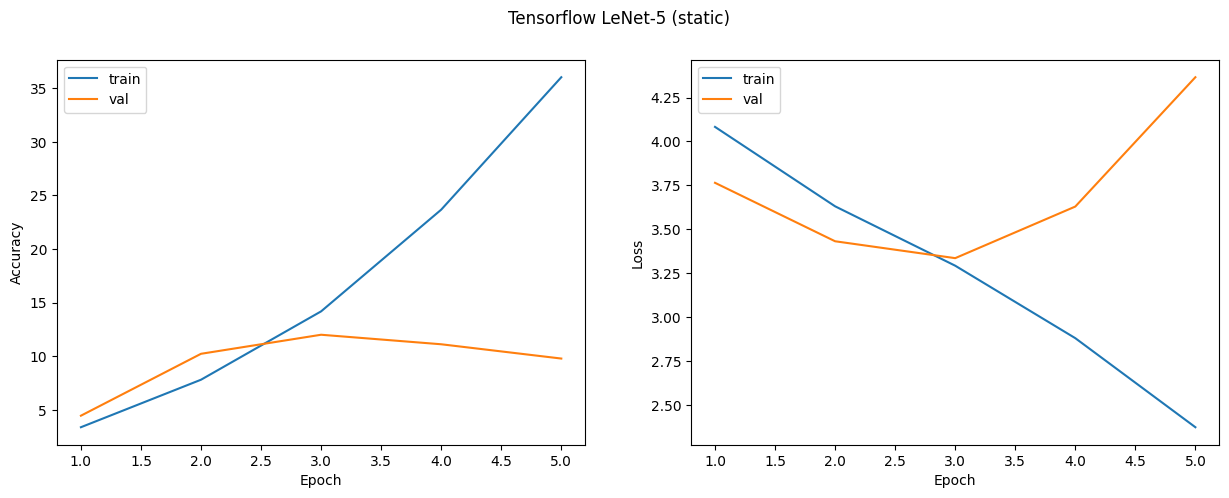

In [32]:
# Tensorflow LeNet-5 static
fig,ax = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Tensorflow LeNet-5 (static)')
ax[0].plot(range(1,num_epochs+1),df_model_tf_dynamic['train_acc'], label='train')
ax[0].plot(range(1,num_epochs+1),df_model_tf_dynamic['val_acc'], label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(range(1,num_epochs+1),df_model_tf_dynamic['train_loss'], label='train')
ax[1].plot(range(1,num_epochs+1),df_model_tf_dynamic['val_loss'], label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()